In [72]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats




Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещённую и несмещённую оценки дисперсии для данной выборки.


In [108]:
df= [0, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

df_DF = pd.DataFrame(df, index=None)
df_mean= int(sum(df)/len(df))
df_s = sum(df)

df_mean, np.mean(df)#,sum(df), len(df),type(df), df_DF

(60, 60.3)

In [109]:
# df_ss = ((df_s - df_mean)**2)**0.5/len(df)
df_std = np.sqrt(((df_DF - df_DF.mean()) ** 2).sum() / df_DF.count())
check = df_DF.std(ddof=0)

print('Среднее квадратичное отклонение: {}, проверка: {} '. format(df_std, check))

Среднее квадратичное отклонение: 0    32.834585
dtype: float64, проверка: 0    32.834585
dtype: float64 


In [112]:
df_Disp_S =((df_DF - df_DF.mean()) ** 2).sum() / df_DF.count()
df_Disp_N = abs((df_DF - df_DF.mean()) ** 2).sum() / (df_DF.count()-1)
    
print('Oценки дисперсии - cмещённая: {} , несмещённая: {}'.format(df_Disp_S, df_Disp_N )  )
df_DF.var(ddof=0), df_DF.var(ddof=1)    

Oценки дисперсии - cмещённая: 0    1078.11
dtype: float64 , несмещённая: 0    1134.852632
dtype: float64


(0    1078.11
 dtype: float64, 0    1134.852632
 dtype: float64)

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot.

В этой задаче также нельзя использовать статистические функции. Неоднозначности в вычислении квантилей можно разрешать любым способом

In [118]:
df_len=len(sorted(df))
df_len

20

In [161]:
erste = df[df_len // 4 - 5 : df_len // 4 + 5]
dritte = df[df_len*3// 4-5 : df_len*3 // 4 + 5]

print('1_Qrtl: {}, 3_Qrtl: {}'. format(erste, dritte))
df_DF.quantile(0.25), df_DF.quantile(0.75)

np.quantile(df, [0.25, 0.75]), df_DF.quantile([0.25, 0.6, 0.75])
# sum(erste), df_len*(1/2)



1_Qrtl: [0, 80, 75, 77, 89, 33, 45, 25, 65, 17], 3_Qrtl: [30, 24, 57, 55, 70, 75, 65, 84, 90, 150]


(array([32.25, 77.75]),           0
 0.25  32.25
 0.60  72.00
 0.75  77.75)

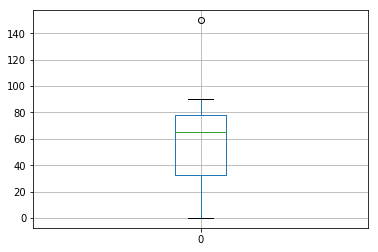

In [131]:

df_DF.boxplot()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7db590d908>]],
      dtype=object)

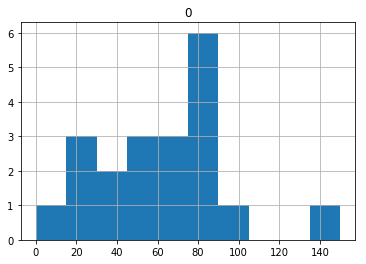

In [128]:
df_DF.hist(bins=10)

In [166]:
q1 = df_DF.quantile(0.25)
q3 = df_DF.quantile(0.75)

iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

# Не могу въехать => откуда взялось =>  -36(!??)


(0   -36.0
 dtype: float64, 0    146.0
 dtype: float64)

In [175]:
outliers = (df_DF < boxplot_range[0]) | (df_DF > boxplot_range[1])

outliers.shape[0], outliers.shape[0] / df_DF.shape[0]
# outliers

(20, 1.0)



В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. 
Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. 
Для студента факультета B эта вероятность равна 0.7, 

а для студента факультета C - 0.9. 

Студент сдал первую сессию. 

Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

In [ ]:
# def bernulli_tick(full_var: float,  know_answer:float)-> float:


def bernulli_tick(ticket: int, var_ques: int, know_answer:int)-> int:
   
    C = np.math.factorial(ticket)/(np.math.factorial(ticket - know_answer)*np.math.factorial(know_answer)) 
    
    p = 1/var_ques
    
    p_k = p**know_answer
    n_k = ticket - know_answer
    
    P = C* p_k *((1-p)** n_k)
    
    return P
#     for i in range(0,ticket):
#         print(bernulli_tick())

In [ ]:

def bernulli_shot(all_shot: int, p: int, hit:int)-> int:
   
    C = np.math.factorial(all_shot)/(np.math.factorial(all_shot - hit)*np.math.factorial(hit)) 
    
#     p = 0.01
    
    p_k = p**hit
    n_k = all_shot - hit
    
    P = C* p_k *((1-p)** n_k)
    
    return P